In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [7]:
# count bigrams in a python dictionary
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram,0) + 1

In [8]:
sorted(b.items(), key = lambda kv: -kv[1])[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [9]:
# create a 2D torch tensor to count bigrams
# the rows are the first character of the bigram, the columns are the second character
# each entry in this 2D array will tell us how often the second character follows the first character in the 
# dataset

N = torch.zeros((27,27), dtype=torch.int32)

In [10]:
chars = sorted(list(set(''.join(words))))
chars[:10]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [34]:
stoi = {s:i+1 for i,s in enumerate(chars)} # string to integer mapping
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [35]:
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()} # integer to string mapping
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [13]:
# populate N

for w in words:
    chs = ['.'] + list(w) + ['.'] # delete spurious (S) and (E) tokens in favor of a single . token
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

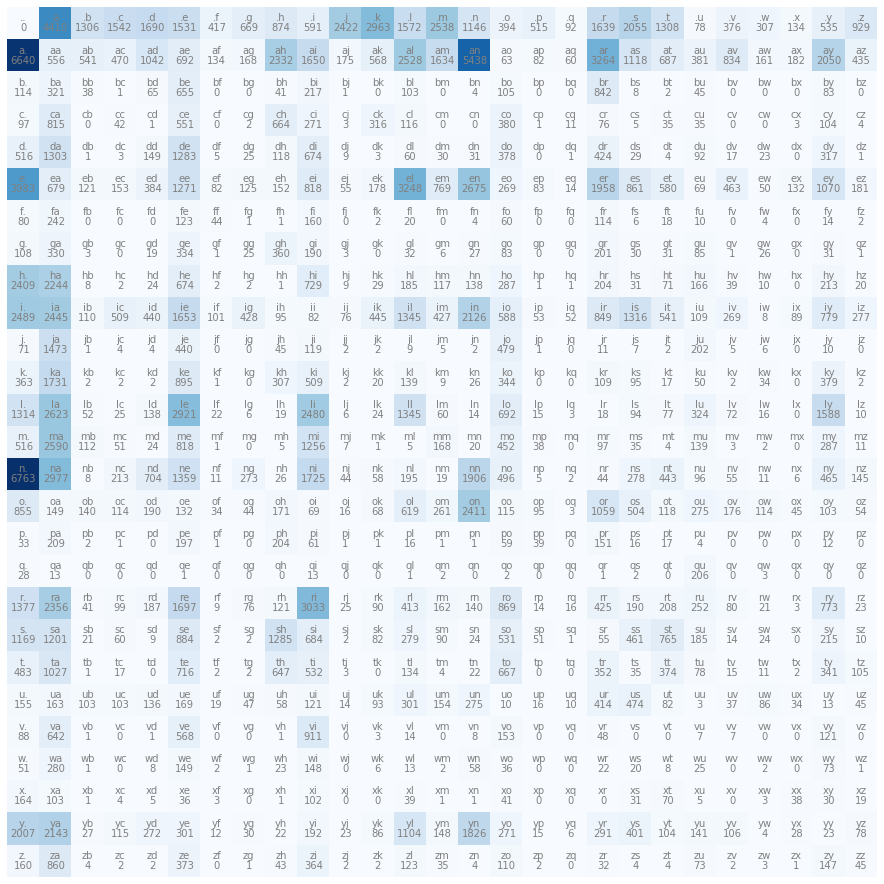

In [14]:
# visualize the bigram tensor

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [37]:
N[0, :] # first row (counts of the first letter starting a word)

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [16]:
N[:,0] # first column (counts of the first letter ending a word)

tensor([   0, 6640,  114,   97,  516, 3983,   80,  108, 2409, 2489,   71,  363,
        1314,  516, 6763,  855,   33,   28, 1377, 1169,  483,  155,   88,   51,
         164, 2007,  160], dtype=torch.int32)

In [17]:
# convert the counts for the first row to probabilities (the probability
# of any single character to be the first character of a word)

p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [18]:
# how to sample from a set of probabilities say probs

# create probabilities

g = torch.Generator().manual_seed(2147483647) # generator to fix seed
probs = torch.rand(3, generator=g)
probs = probs / probs.sum()
print(probs)

# generate 20 samples (will give the indices of the samples)

torch.multinomial(probs, num_samples=20, replacement=True, generator=g)

tensor([0.6064, 0.3033, 0.0903])


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [19]:
# sample from the first row probablities of N , i.e., p

g = torch.Generator().manual_seed(2147483647)
# get one sample
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix] # find which character we are sampling

'm'

In [40]:
# sample 5 new names from the data (the names will be terrible beacuse the bigram model is a very simplistic 
#                                   model!)

g = torch.Generator().manual_seed(2147483647)
names = []
for i in range(5):
    out = []
    ix = 0
    while True:
        p = N[ix].float() # select the first row of N
        p = p / p.sum() # calculate probablities
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # sample an index
        print('Sampled index :', ix)
        out.append(itos[ix])
        if ix == 0:
            break
    print('Name: ', ''.join(out))
    names.append(''.join(out))
    print('-'*100)
    
print(names)

Sampled index : 13
Sampled index : 15
Sampled index : 18
Sampled index : 0
Name:  mor.
----------------------------------------------------------------------------------------------------
Sampled index : 1
Sampled index : 24
Sampled index : 24
Sampled index : 0
Name:  axx.
----------------------------------------------------------------------------------------------------
Sampled index : 13
Sampled index : 9
Sampled index : 14
Sampled index : 1
Sampled index : 25
Sampled index : 13
Sampled index : 15
Sampled index : 18
Sampled index : 25
Sampled index : 12
Sampled index : 5
Sampled index : 19
Sampled index : 0
Name:  minaymoryles.
----------------------------------------------------------------------------------------------------
Sampled index : 11
Sampled index : 15
Sampled index : 14
Sampled index : 4
Sampled index : 12
Sampled index : 1
Sampled index : 9
Sampled index : 19
Sampled index : 1
Sampled index : 8
Sampled index : 0
Name:  kondlaisah.
--------------------------------------

In [21]:
# Normalize all the rows of N, i.e., calculate the probablities for each row

P = N.float()

# P.shape                         torch.Size([27, 27])
# P.sum(0, keepdims=True).shape   torch.Size([1, 27])
# P.sum(1, keepdims=True).shape   torch.Size([27, 1])

P /= P.sum(1, keepdims=True) # sum across the rows, the division operation is allowed because of broadcasting
                              # keepdims must be True to avoid errors

In [22]:
# make the loop more efficient

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [23]:
# check probabilities and calculate log probabilities that the model assigns to bigrams

for w in words[:3]: # check for first three words
    chs = ['.'] + list(w) + ['.'] 
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.1960 -1.6299
.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.1960 -1.6299


In [38]:
# Evaluate model quality
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'Log likelihood : {log_likelihood}')
nll = -log_likelihood
print(f'Negative log likelihood : {nll}')
print(f'Average negative log likelihood : {nll/n}')

Log likelihood : -559891.75
Negative log likelihood : 559891.75
Average negative log likelihood : 2.454094171524048


In [25]:
# some probablities can be infinity, which will make all metrics infinity..example below with a name like
# 'andrejq'

log_likelihood = 0.0
n = 0

for w in ['andrejq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'Log likelihood : {log_likelihood}')
nll = -log_likelihood
print(f'Negative log likelihood : {nll}')
print(f'Average negative log likelihood : {nll/n}')

.a: 0.1377 -1.9829
an: 0.1605 -1.8296
nd: 0.0384 -3.2594
dr: 0.0771 -2.5620
re: 0.1336 -2.0127
ej: 0.0027 -5.9171
jq: 0.0000 -inf
q.: 0.1029 -2.2736
Log likelihood : -inf
Negative log likelihood : inf
Average negative log likelihood : inf


In [26]:
# introduce model smoothing to fix the above problem

P_smooth = (N+1).float() # add a number to remove zero probabilities
P_smooth /= P_smooth.sum(1, keepdims=True) 

In [32]:
# zero probabbilities have been eliminated

log_likelihood = 0.0
n = 0

for w in ['andrejq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P_smooth[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'Log likelihood : {log_likelihood:.4f}')
nll = -log_likelihood
print(f'Negative log likelihood : {nll:.4f}')
print(f'Average negative log likelihood : {nll/n:.4f}')

.a: 0.1376 -1.9835
an: 0.1604 -1.8302
nd: 0.0384 -3.2594
dr: 0.0770 -2.5646
re: 0.1334 -2.0143
ej: 0.0027 -5.9004
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
Log likelihood : -27.8672
Negative log likelihood : 27.8672
Average negative log likelihood : 3.4834


In [33]:
llh = 0.0
num = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P_smooth[ix1, ix2]
        logprob = torch.log(prob)
        llh += logprob
        num += 1
        #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'Log likelihood : {llh:.4f}')
nll = -llh
print(f'Negative log likelihood : {nll:.4f}')
print(f'Average negative log likelihood : {nll/num:.4f}')

Log likelihood : -559951.5625
Negative log likelihood : 559951.5625
Average negative log likelihood : 2.4544
